In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# EDA 
print("Dataset Info")
data.info()

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
print("Dataset Description")
data.describe()

Dataset Description


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#checking duplicate values if any 
data.duplicated().sum()

0

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Data Cleaning & Preprocessing
# Drop irrelevant columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [17]:
# Fill missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [19]:
data['Age'] = data["Age"].astype("int")

In [20]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,S
887,888,1,1,female,19,0,0,30.0000,S
888,889,0,3,female,29,1,2,23.4500,S
889,890,1,1,male,26,0,0,30.0000,C


In [21]:
# Convert categorical to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [24]:
# defining features and target 
X = data.drop(columns = "Survived")
y = data['Survived']

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
# training the model 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
# predicting the values
y_pred = model.predict(x_test)

In [37]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458

Confusion Matrix:
 [[91 14]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



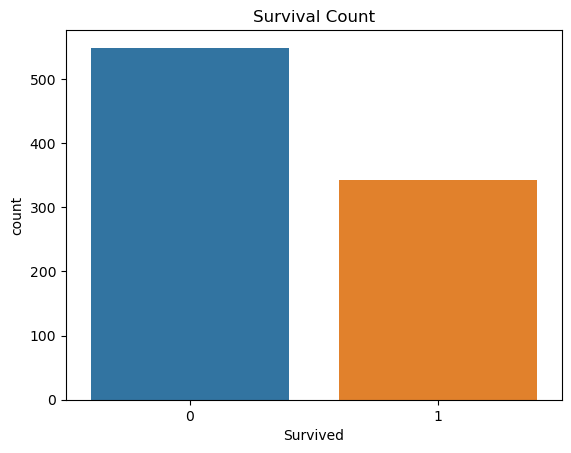

In [38]:
# Visualization 
sns.countplot(x = data['Survived'])
plt.title("Survival Count")
plt.show()

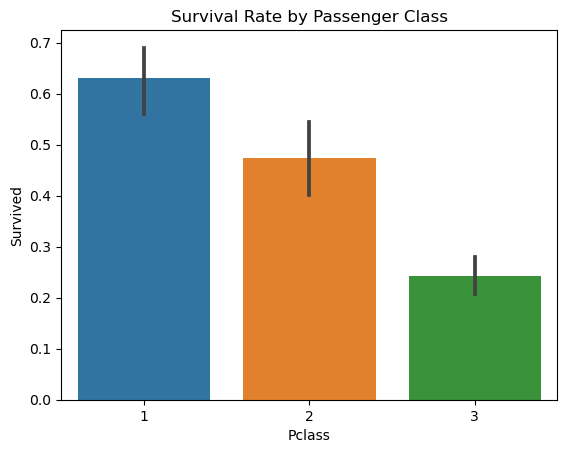

In [42]:
sns.barplot(data=data, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.show()

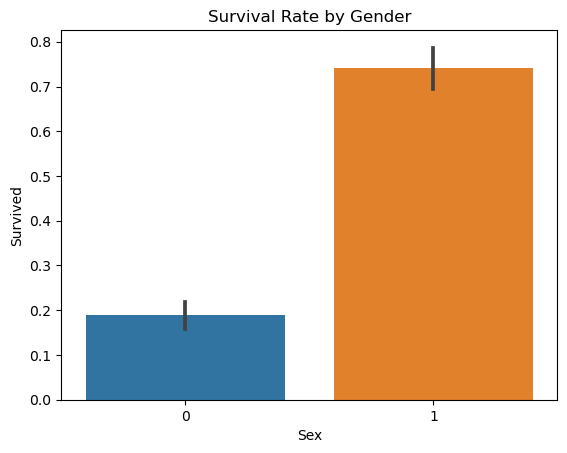

In [44]:
sns.barplot(data=data, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()

In [50]:
# Make Prediction on New Data
sample = pd.DataFrame({
    'PassengerId':[1],
    'Pclass': [3],
    'Sex': [0],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [0]
})

In [51]:
prediction = model.predict(sample)

In [52]:
print("\nSample Prediction (0 = Not Survived, 1 = Survived):", prediction)


Sample Prediction (0 = Not Survived, 1 = Survived): [0]
